# Pymaceuticals Animal Study Analysis 

**Write at least three observations or inferences that can be made from the data.**

- Based on the bar plot of the total number of mice for each treatment group, Capomulin and Ramicane had the most number of mice in its groups in comparison to the other drug regimens. Propriva had the least number of mice. Therefore, Capomulin and Ramicane data would be preferred groups to analyze since the sample size is bigger and may be more reflective of the population with a higher likelihood of being statistically significant. 

- The box plot reflects that the final tumor volumes in the drug regimens Capomulin and Ramicane are lesser than Infubinol and Ceftamin; thus Capomulin and Ramicane may be more effective in decreasing the tumor volumes in Squamous Cell Carinomas. 

- A trend of mouse l509's tumor volume while on the drug Capomulin was plotted over time. Based on the trendline, his tumor volume starts to show a decrease in tumor volume around day 20 and continues to show intermittent decreases. However, the tumor intially grows in volume from day 0 to 20 although he receives Capomulin. This information can be useful to generate a predicted drug response timeline while receiving a treatment regimen. However, more data needs to be evaluated to create a more accurate inference. Thus, evaluation of drug responses across a larger sample of mice can support a stronger predicted response rate. 

- There is a strong positive correlation between the mouse weight and the average tumor volume in the Capomulin drug regimen group.  Thus, mice with heavier weights will have a higher tumor volume. 


## Observations and Insights 

In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Set paths for files 
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"
# Read the mouse data and the study results files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset by merging with common mouse ID 
mergedStudy_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
mergedStudy_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice by counting unique mouse ID 
num_mice = mergedStudy_df["Mouse ID"].unique() 
len(num_mice)

249

In [5]:
# Getting duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
repeated = mergedStudy_df[mergedStudy_df.duplicated(subset = ['Mouse ID','Timepoint'])]
repeated['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Getting all the data for the duplicate mouse ID
duplicate_mouse = mergedStudy_df.loc[mergedStudy_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mouse = mergedStudy_df.drop(mergedStudy_df[mergedStudy_df['Mouse ID'] == "g989"].index)
dropped_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = dropped_mouse["Mouse ID"].unique()
len(clean_mice)

248

## Summary Statistics 

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_df = dropped_mouse.groupby('Drug Regimen').mean()
median_df = dropped_mouse.groupby('Drug Regimen').median()
variance_df = dropped_mouse.groupby('Drug Regimen').var()
stdev_df = dropped_mouse.groupby('Drug Regimen').std()
sem_df = dropped_mouse.groupby('Drug Regimen').sem()

# Assemble the resulting series into a single summary dataframe.
summary_columns ={'Mean Tumor Volume':mean_df['Tumor Volume (mm3)'],
                   'Median Tumor Volume':median_df['Tumor Volume (mm3)'],
                   'Tumor Volume Variance':variance_df['Tumor Volume (mm3)'],
                   'Tumor Volume Std. Dev.':stdev_df['Tumor Volume (mm3)'],                  
                   'Tumor Volume Std. Err.':sem_df['Tumor Volume (mm3)']
                    }                            
summary_stat = pd.DataFrame(summary_columns)
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen using the aggregation method
# Produce the same summary statistics in a single line
new_summary = dropped_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
new_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

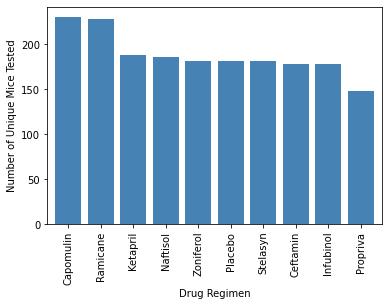

In [11]:
# Generate a bar plot showing the total number of mice 
# for each treatment throughout the course of the study using pandas. 

# Group by drug regimen and count the number of mice 
drug_mice = dropped_mouse.groupby('Drug Regimen').count()

# Sort into descending order 
sorted_drug = drug_mice.sort_values(by = 'Mouse ID', ascending=False)

# Plot with pandas
panda_bar = sorted_drug.plot (kind = 'bar', color = 'steelblue', legend = False, width=.8)
plt.ylabel('Number of Unique Mice Tested')
plt.xlabel('Drug Regimen');

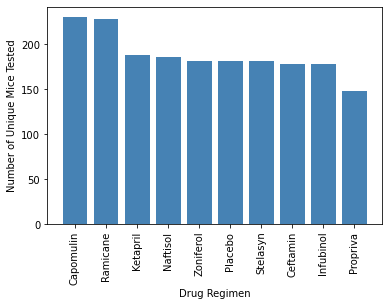

In [12]:
# Generate a bar plot showing the total number of mice 
# for each treatment throughout the course of the study using pyplot 

# Find length of x-axis 
x_axis = np.arange(len(sorted_drug))

#Create tick locations for x-axis 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sorted_drug.index.values, rotation = 'vertical')

# Plot with pyplot
plt.bar(x_axis, sorted_drug['Mouse ID'], color = 'steelblue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested');


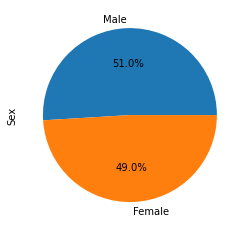

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender and count the mice 
gender_mice = dropped_mouse.groupby('Sex').count()

# Show male mice on upper half of pie plot 
sorted_gender = gender_mice.sort_values(by = 'Mouse ID', ascending=False)

# Plot with pandas 
sorted_gender.plot.pie(y = 'Mouse ID', autopct = '%1.1f%%', 
                       label = 'Sex', legend = False);

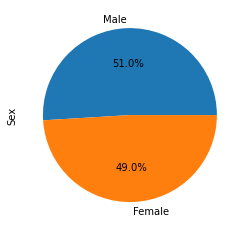

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot with pyplot using sorted data from previous exercise 
plt.pie(sorted_gender['Mouse ID'], labels = ['Male','Female'], autopct = '%1.1f%%')
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse 
# Get the last (greatest) timepoint for each mouse
max_timepoint = dropped_mouse.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_merged = pd.merge(max_timepoint, dropped_mouse, on=['Mouse ID','Timepoint'], how = 'left')
clean_merged;

In [22]:
# Code given by instructor 

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_merged.loc[clean_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")   


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


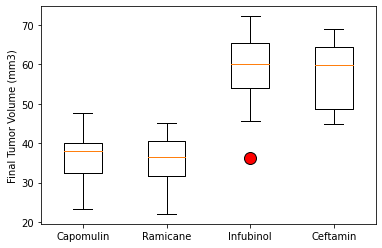

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens 

# Plot box plot and change outlier color and size 
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o',markerfacecolor='r',markersize=12)
plt.boxplot(tumor_vol_list,flierprops=flierprops)
ax1.set_xticklabels(treatment_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots


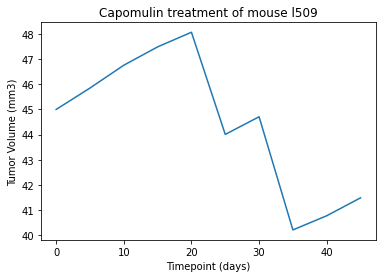

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find the mouse with ID l509
capomulin_mice = dropped_mouse.loc[dropped_mouse['Drug Regimen'] == 'Capomulin', :]
mouse_l509 = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 'l509', :]

# Plot line plot 
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
l509_plot = plt.plot(mouse_l509['Timepoint'],mouse_l509['Tumor Volume (mm3)'])

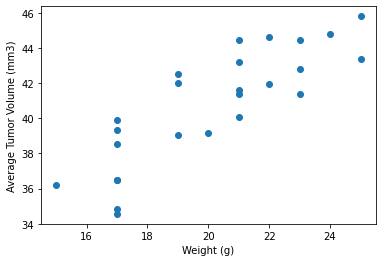

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group by mouse ID and find the average tumor volume for that mouse 
avg_tumor_vol = capomulin_mice.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

# Create a dataframe and rename column 
avg_tumor = pd.DataFrame(avg_tumor_vol)
renamed_avg_tumor = avg_tumor.rename(columns = {"Tumor Volume (mm3)": "Avg Tumor Volume"})

# Merge with original dataframe by common mouse ID
merged_Capomulin = pd.merge(renamed_avg_tumor, mouse_metadata, on = 'Mouse ID')

# Plot scatterplot 
plt.scatter(merged_Capomulin['Weight (g)'], merged_Capomulin['Avg Tumor Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


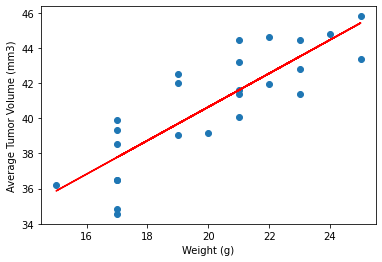

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen

# Set x and y values 
x_values = merged_Capomulin['Weight (g)']
y_values = merged_Capomulin['Avg Tumor Volume']

#Calculate correlation coefficient 
corr_coef = round(st.pearsonr(x_values,y_values)[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {corr_coef}.')

# Plot scatter plot with the linera regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [ ]:
# This code is not part of challenge/homework. 
# It finds final tumor volume in only 4 of the treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) 
# and concats into a summary table. 

# Find mice in drug regimen Capomulin and find the greatest timepoint 
capomulin_mice = dropped_mouse.loc[dropped_mouse['Drug Regimen'] == 'Capomulin', :]
ca_timepoint = capomulin_mice.groupby('Mouse ID').max()['Timepoint']
# Merge with the Capomulin only dataframe to get the tumor volume at the last timepoint
capomulin_volume = pd.merge(ca_timepoint, capomulin_mice, on=('Mouse ID','Timepoint'), how = 'left')

# Find mice in drug regimen Ramicane and find the greatest timepoint 
ramicane_mice = dropped_mouse.loc[dropped_mouse['Drug Regimen'] == 'Ramicane', :]
r_timepoint = ramicane_mice.groupby('Mouse ID').max()['Timepoint']
# Merge with the Ramicane only dataframe to get the tumor volume at the last timepoint
ramicane_volume = pd.merge(r_timepoint, ramicane_mice, on=('Mouse ID','Timepoint'), how = 'left')

# Find mice in drug regimen Infubinol and find the greatest timepoint 
infubinol_mice = dropped_mouse.loc[dropped_mouse['Drug Regimen'] == 'Infubinol', :]
i_timepoint = infubinol_mice.groupby('Mouse ID').max()['Timepoint']
# Merge with the Infubinol only dataframe to get the tumor volume at the last timepoint
infubinol_volume = pd.merge(i_timepoint, infubinol_mice, on=('Mouse ID','Timepoint'), how = 'left')

# Find mice in drug regimen Ceftamin and find the greatest timepoint 
ceftamin_mice = dropped_mouse.loc[dropped_mouse['Drug Regimen'] == 'Ceftamin', :]
ce_timepoint = ceftamin_mice.groupby('Mouse ID').max()['Timepoint']
# Merge with the Ceftamin only dataframe to get the tumor volume at the last timepoint
ceftamin_volume = pd.merge(ce_timepoint, ceftamin_mice, on=('Mouse ID','Timepoint'), how = 'left')

# Combine all drug regimen dataframes created above 
drug_regimen_combined = pd.concat([capomulin_volume,ramicane_volume,infubinol_volume, ceftamin_volume], ignore_index=True)


